In [1]:
import pandas as pd
import matplotlib
import theano
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from neupy import algorithms, layers, init, environment, plots
from neupy.exceptions import StopTraining
#theano.config.floatX = 'float32'

In [62]:
environment.reproducible() 
#environment.speedup()
learn_data=pd.read_csv("../learn_data.csv", index_col=0)
#learn_data=pd.DataFrame(learn_data, dtype='float32')
learn_data=np.array(learn_data)
validation_data=pd.read_csv("../valid_data.csv", index_col=0)
#validation_data=pd.DataFrame(validation_data, dtype='float32')
validation_data=np.array(validation_data)
test_data=pd.read_csv("../test_data.csv", index_col=0)
#test_data=pd.DataFrame(test_data, dtype='float32')
test_data=np.array(test_data)
eps=0.000001
number_of_epochs=1000
nets={}

In [33]:
environment.reproducible() 

eps=0.000001
number_of_epochs=1000

In [34]:
learn_data = pd.read_csv('./split_data/train_set.csv').values
valid_data = pd.read_csv('./split_data/val_set.csv').values
test_data = pd.read_csv('./split_data/test_set.csv').values

In [36]:
learn_params=learn_data[:,0:4]
learn_target=learn_data[:,4]
test_params=test_data[:,0:4]
test_target=test_data[:,4]
validation_params=valid_data[:,0:4]
validation_target=valid_data[:,4]

In [37]:
#сами реализуйте функцию ошибки, я не смог в нормальном виде из сети результат вытянуть
test_errors=[]
def signal(net):
    test_errors.append(((net.predict(test_params)-test_target)**2).sum()/len(test_target))
    if len(net.errors)>20:
        if abs(net.errors[len(net.errors)-1]-net.errors[len(net.errors)-2]) < eps:
            raise StopTraining("Training has been interrupted")

In [38]:
stepnet=algorithms.GradientDescent(
     connection=[
         layers.Input(4),
         layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Tanh(5, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Linear(1, weight=init.XavierNormal(), bias=init.XavierNormal()),
     ],
     search_method='golden',
     error='mse',
     addons=[algorithms.LinearSearch],
     verbose=True,
     epoch_end_signal=signal,
     shuffle_data=True,
     show_epoch=50
     
)



Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.35 seconds


In [39]:
weight1=stepnet.layers[1].weight.get_value()
bias1=stepnet.layers[1].bias.get_value()
weight2=stepnet.layers[2].weight.get_value()
bias2=stepnet.layers[2].bias.get_value()
weight3=stepnet.layers[3].weight.get_value()
bias3=stepnet.layers[3].bias.get_value()
weight4=stepnet.layers[4].weight.get_value()
bias4=stepnet.layers[4].bias.get_value()
bias1.shape

(10,)

In [40]:
stepnet.train(learn_params, learn_target, test_params, test_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (5622, 4)
[TEST DATA] shapes: (938, 4)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.06183 |    0.074231 |      218 ms |
|          50 |    0.006971 |    0.010139 |      214 ms |
|         100 |   0.0058501 |   0.0088395 |      367 ms |
|         150 |    0.005228 |   0.0081157 |      242 ms |
|         200 |   0.0048295 |   0.0076103 |      241 ms |
|         250 |   0.0045404 |   0.0072549 |      252 ms |
|         300 |   0.0043177 |   0.0069676 |      221 ms |
|         350 |   0.0041387 |   0.0067363 |      251 ms |
|         400 |   0.0039942 |   0.0065598 |      241 ms |
|         450 |   0.0038759 |   0.0064014 |      229 ms |
|         500 |   0.0037787 |   0.0062671 |      223 ms |
|         550 |   0.0036985 |    0.006151 |      215 ms |
|         600 |   0

In [30]:
print("sgd train error "+str(stepnet.train_errors.last()))
print("sgd test error "+str(test_errors[len(test_errors)-1]))
#plt.clf()
fig = plt.figure(clear=True)
plt.grid(True)
plt.plot(stepnet.train_errors, color='r', label='train') 
#plt.plot(stepnet.validation_errors, color='b', label='valid') 
#plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('./PUNKT_4_9/SGD_train.png', bbox_inches='tight')
#nets["sgd"]=stepnet.last_epoch

sgd train error 0.0035596211870659537
sgd test error 105.7242027987302


In [41]:
print("sgd train error "+str(stepnet.train_errors.last()))
print("sgd test error "+str(test_errors[len(test_errors)-1]))
#plt.clf()
fig = plt.figure(clear=True)
plt.grid(True)
#plt.plot(stepnet.train_errors, color='r', label='train') 
#plt.plot(stepnet.validation_errors, color='b', label='valid') 
plt.plot(stepnet.validation_errors, color='g', label='test')
plt.legend()
plt.savefig('./PUNKT_4_9/SGD_test.png', bbox_inches='tight')
#nets["sgd"]=stepnet.last_epoch

sgd train error 0.0035596211870659537
sgd test error 105.7242027987302


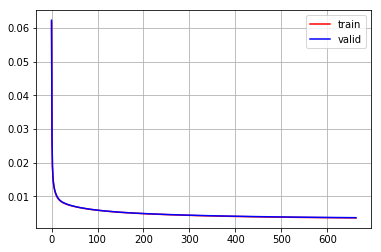

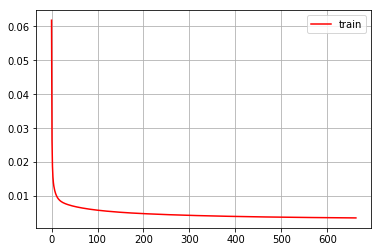

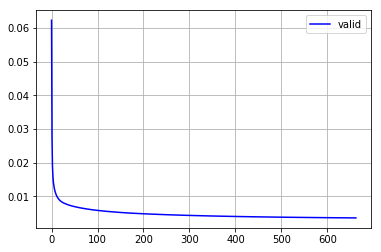

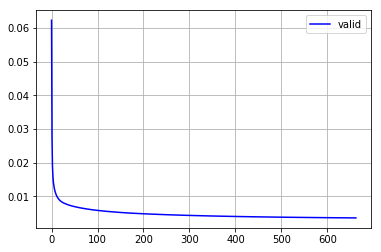

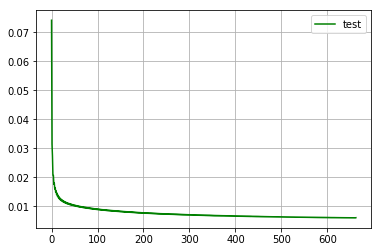

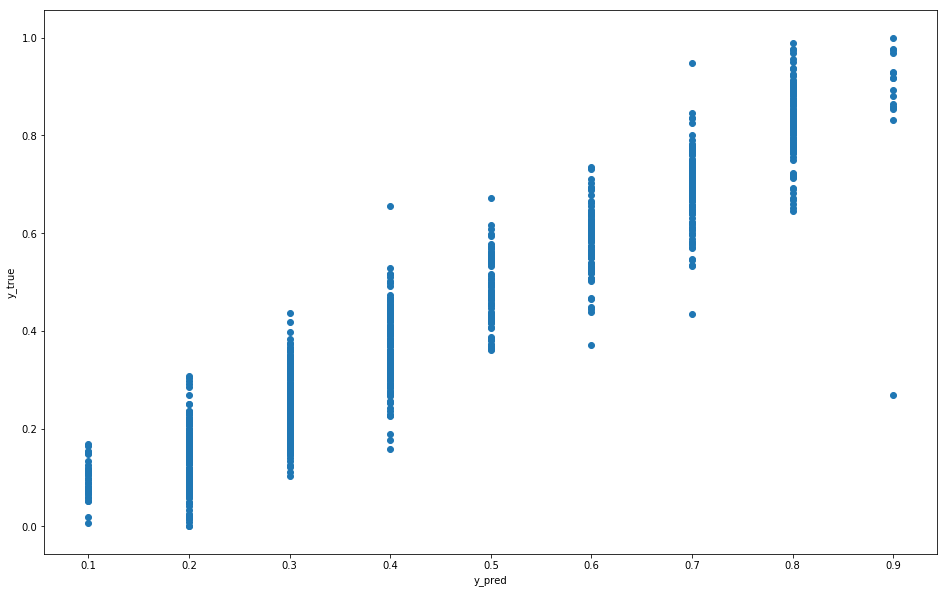

In [42]:
y_pred = stepnet.predict(test_params).round(1)

fig = plt.figure(figsize=(16, 10))
plt.scatter(y_pred, test_target)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

_______________________________________________________________________

In [9]:
test_errors=[]
fletchernet = algorithms.ConjugateGradient(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=weight1, bias=bias1),
         layers.Tanh(10, weight=weight2, bias=bias2),
         layers.Tanh(5, weight=weight3, bias=bias3),
         layers.Linear(1, weight=weight4, bias=bias4),
     ],
     search_method='golden',
     update_function='fletcher_reeves',
     error='mse',
     shuffle_data=False,
     addons=[algorithms.LinearSearch],
     step=0.01,
     verbose=True,
     epoch_end_signal=signal,
     show_epoch=50
 )


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = fletcher_reeves
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.23 seconds


In [10]:
fletchernet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      0.9151 |     0.91445 |      175 ms |
|          50 |     0.12863 |     0.12563 |      149 ms |
|         100 |     0.12751 |     0.12422 |      152 ms |
|         150 |     0.12671 |     0.12354 |      176 ms |
|         200 |     0.12569 |     0.12282 |      182 ms |
|         250 |     0.12407 |     0.12141 |      173 ms |
|         300 |     0.12355 |     0.12119 |      173 ms |
|         350 |     0.12255 |     0.12094 |      183 ms |
|         400 |      0.1221 |     0.12239 |      185 ms |
---------------------------------------------------------
[TRAIN] Epoch #424 stopped. Training has been interrupted
|         424 |     0.12167 |     0.12123 |      267 ms |



fletcher train error 0.12166561429181127
fletcher test error 0.1128994318170728


{'addons': Option(class_name='GradientDescent', value=Property(name="addons")),
 'epoch_end_signal': Option(class_name='BaseNetwork', value=Property(name="epoch_end_signal")),
 'error': Option(class_name='ConstructibleNetwork', value=ErrorFunctionProperty(name="error")),
 'maxiter': Option(class_name='LinearSearch', value=BoundedProperty(name="maxiter")),
 'search_method': Option(class_name='LinearSearch', value=ChoiceProperty(name="search_method")),
 'show_epoch': Option(class_name='BaseNetwork', value=ShowEpochProperty(name="show_epoch")),
 'shuffle_data': Option(class_name='BaseNetwork', value=Property(name="shuffle_data")),
 'step': Option(class_name='BaseNetwork', value=NumberProperty(name="step")),
 'tol': Option(class_name='LinearSearch', value=BoundedProperty(name="tol")),
 'train_end_signal': Option(class_name='BaseNetwork', value=Property(name="train_end_signal")),
 'update_function': Option(class_name='ConjugateGradient', value=ChoiceProperty(name="update_function")),
 'verb

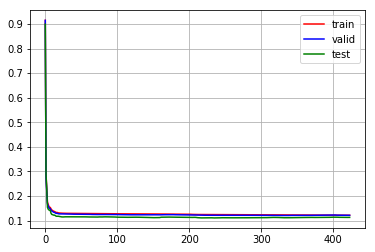

In [11]:
print("fletcher train error "+str(fletchernet.train_errors.last()))
print("fletcher test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(fletchernet.train_errors, color='r', label='train') 
plt.plot(fletchernet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Fletcher_train_valid_test.png', bbox_inches='tight')
nets["fletcher"]=fletchernet.last_epoch

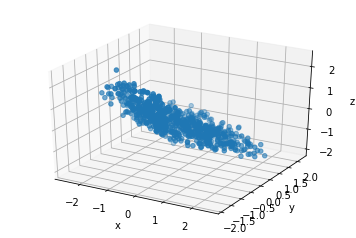

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(test_data.transpose()[1], test_data.transpose()[0], test_data.transpose()[2])
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()

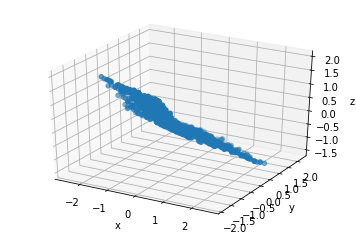

In [13]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(test_data.transpose()[1], test_data.transpose()[0], stepnet.predict(test_params))
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()

In [14]:
test_errors=[]
polaknet = algorithms.ConjugateGradient(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=weight1, bias=bias1),
         layers.Tanh(10, weight=weight2, bias=bias2),
         layers.Tanh(5, weight=weight3, bias=bias3),
         layers.Linear(1, weight=weight4, bias=bias4),
     ],
     search_method='golden',
     update_function='polak_ribiere',
     error='mse',
     shuffle_data=False,
     addons=[algorithms.LinearSearch],
     verbose=True,
     epoch_end_signal=signal,
     show_epoch=50
 )


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = polak_ribiere
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.65 seconds


In [15]:
polaknet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      0.9151 |     0.91445 |      202 ms |
|          50 |     0.12864 |     0.12568 |      146 ms |
|         100 |     0.12753 |      0.1242 |      228 ms |
|         150 |     0.12597 |     0.12317 |      156 ms |
|         200 |     0.12393 |     0.12127 |      126 ms |
---------------------------------------------------------
[TRAIN] Epoch #204 stopped. Training has been interrupted
|         204 |      0.1239 |     0.12121 |      172 ms |



polak train error 0.12390340678317362
polak test error 0.11117425612196366


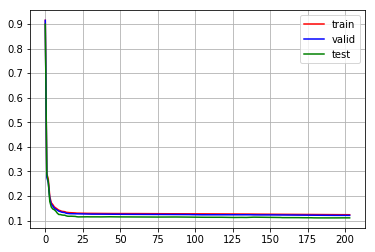

In [16]:
print("polak train error "+str(polaknet.train_errors.last()))
print("polak test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(polaknet.train_errors, color='r', label='train') 
plt.plot(polaknet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Polak_train_valid_test.png', bbox_inches='tight')
nets["polak"]=polaknet.last_epoch

In [55]:
test_errors=[]
bfgsnet = algorithms.QuasiNewton(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=weight1, bias=bias1),
         layers.Tanh(10, weight=weight2, bias=bias2),
         layers.Tanh(5, weight=weight3, bias=bias3),
         layers.Linear(1, weight=weight4, bias=bias4),
     ],
     update_function='bfgs',
     error='mse',
     h0_scale=1,
     epoch_end_signal=signal,
     shuffle_data=True,
     show_epoch=50,
     verbose=True
 )


Main information

[ALGORITHM] QuasiNewton

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None
[OPTION] h0_scale = 1
[OPTION] update_function = bfgs

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 18.46 seconds


In [56]:
bfgsnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.3394 |     0.91329 |      124 ms |
|          50 |     0.12634 |     0.12319 |       40 ms |
|         100 |     0.12296 |     0.12188 |       22 ms |
|         150 |     0.12131 |     0.12097 |       20 ms |
|         200 |     0.12065 |     0.12105 |       24 ms |
|         250 |     0.11997 |     0.12019 |       21 ms |
|         300 |     0.11889 |     0.12054 |       41 ms |
|         350 |     0.11741 |     0.11919 |       22 ms |
|         400 |     0.11645 |     0.11769 |       21 ms |
|         450 |     0.11591 |     0.11749 |       23 ms |
|         500 |     0.11506 |     0.11774 |       27 ms |
|         550 |     0.11427 |     0.11753 |       22 ms |
|         600 |   

bfgs train error 0.11156657906833557
bfgs test error 0.10847436558606707


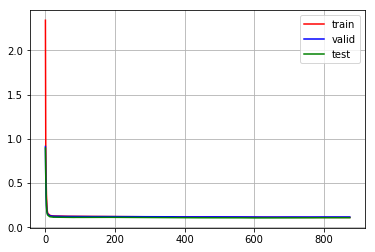

In [58]:
print("bfgs train error "+str(bfgsnet.train_errors.last()))
print("bfgs test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(bfgsnet.train_errors, color='r', label='train') 
plt.plot(bfgsnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Bfgs_train_valid_test.png', bbox_inches='tight')
nets["bfgs"]=bfgsnet.last_epoch

In [54]:
test_errors=[]
lmnet = algorithms.LevenbergMarquardt(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=weight1, bias=bias1),
         layers.Tanh(10, weight=weight2, bias=bias2),
         layers.Tanh(5, weight=weight3, bias=bias3),
         layers.Linear(1, weight=weight4, bias=bias4),
     ],
     epoch_end_signal=signal,
     shuffle_data=True,
     mu=0.5,
     mu_update_factor=1.3,
     show_epoch=50,
     verbose=True
 )


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] train_end_signal = None
[OPTION] addons = None
[OPTION] error = mse
[OPTION] mu = 0.5
[OPTION] mu_update_factor = 1.3

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.60 seconds


In [36]:
lmnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|         195 |     0.30532 |     0.30303 |       3 sec |
---------------------------------------------------------
[TRAIN] Epoch #195 stopped. Training has been interrupted



lm train error None
lm test error 0.10847436558606707


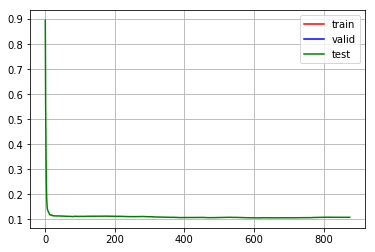

In [66]:
print("lm train error "+str(lmnet.train_errors.last()))
print("lm test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(lmnet.train_errors, color='r', label='train') 
plt.plot(lmnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('LM_train_valid_test.png', bbox_inches='tight')
nets["lm"]=lmnet.last_epoch

In [67]:
#nets=pd.DataFrame(nets)
#nets=np.array(nets)
#nets=pd.DataFrame(nets)
#nets.to_csv("../nets.csv")